# 作業 1

#### 使用 Post，傳入參數 name, age, email 參數，並把資料存入 Member Collection。

In [ ]:
@app.route('/members', methods = ['POST'])
def add_member():
    # 把 form 裡面的資料拿出來
    name = request.form.get('name')
    age = request.form.get('age')
    phone = request.form.get('phone')
    email = request.form.get('email')
    
    # 執行 insert_one 新增一筆資料
    result = mongo.db.Member.insert_one({'name': name, 'age': age, 'phone': phone, 'email': email})
    
    # 回傳新增資料的 id
    return str(result.inserted_id)

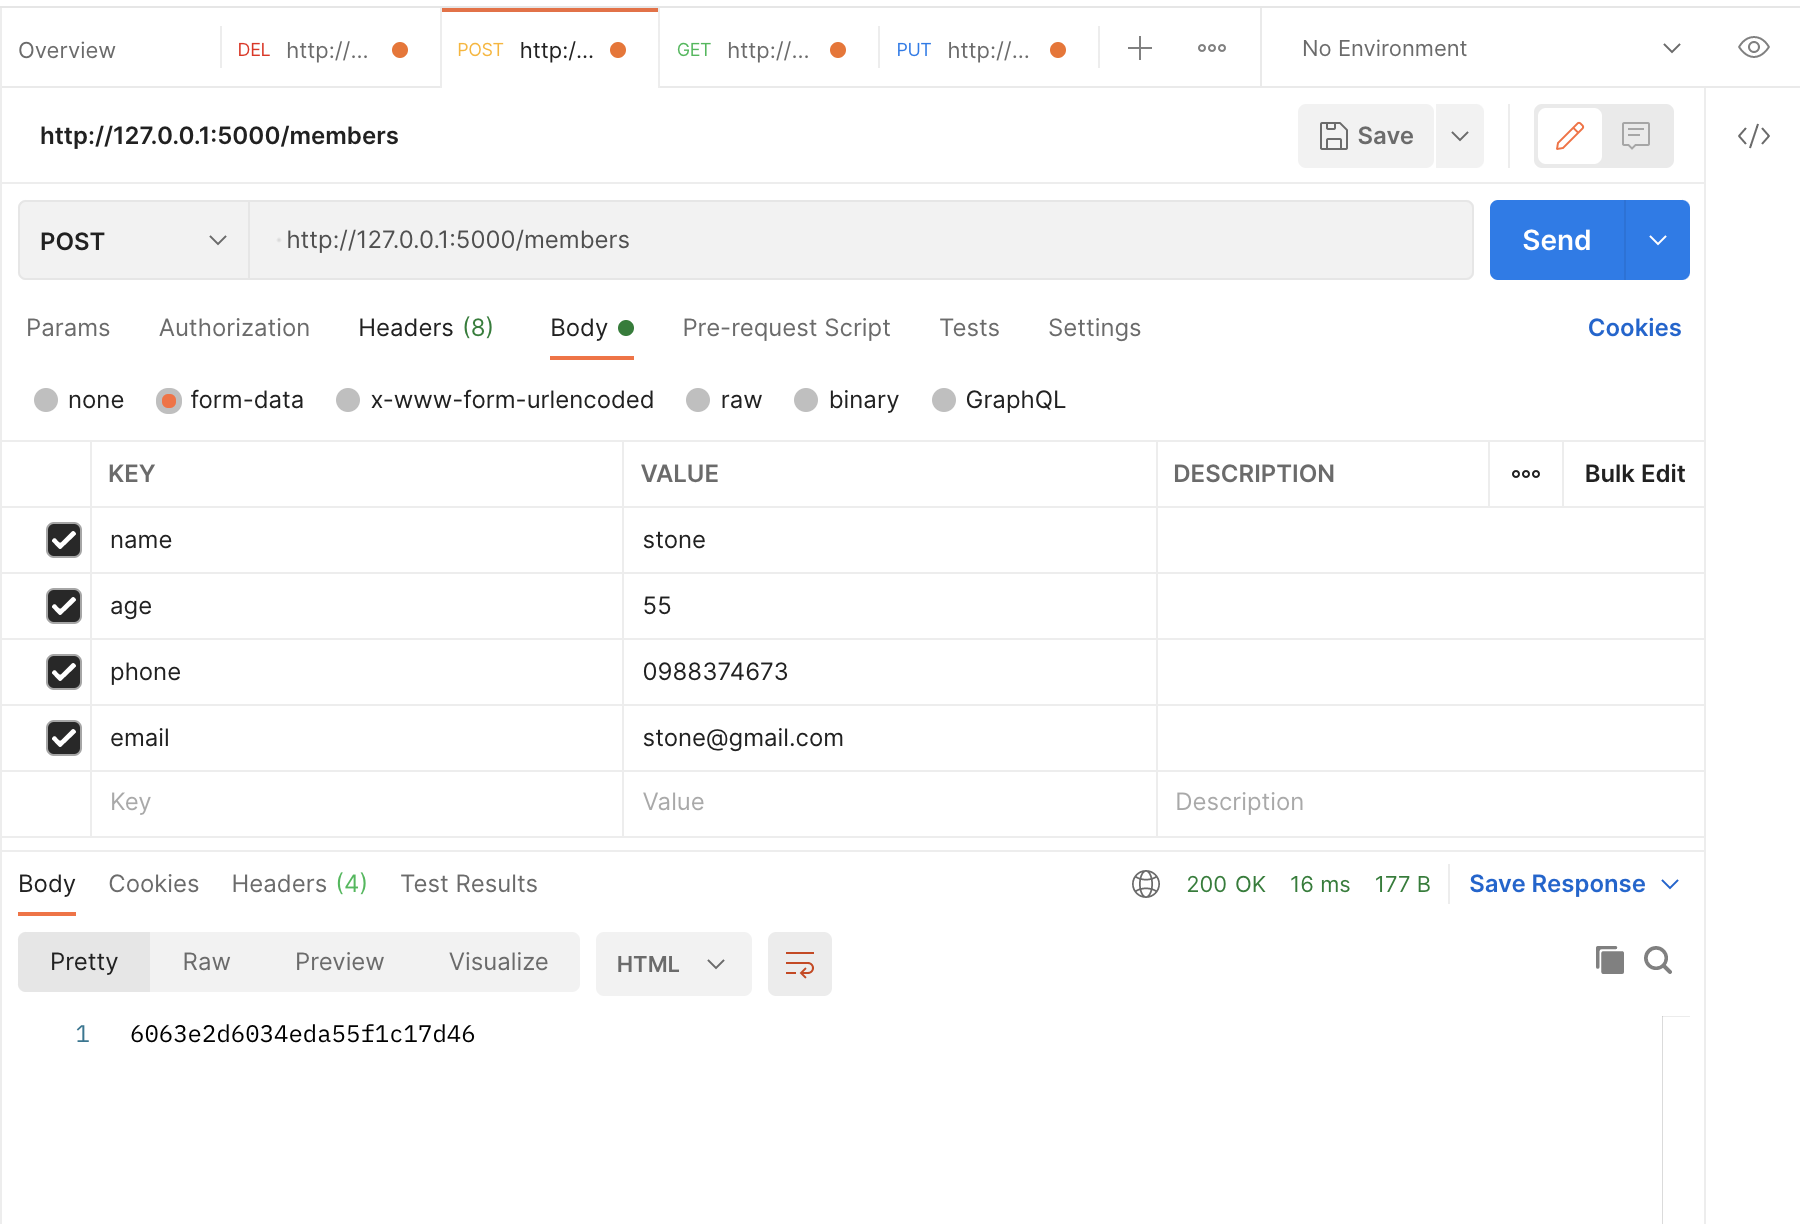

In [1]:
from IPython.display import Image
Image("/Users/lochien-min/Desktop/截圖 2021-03-31 上午11.05.43.png",width=400,height=400)

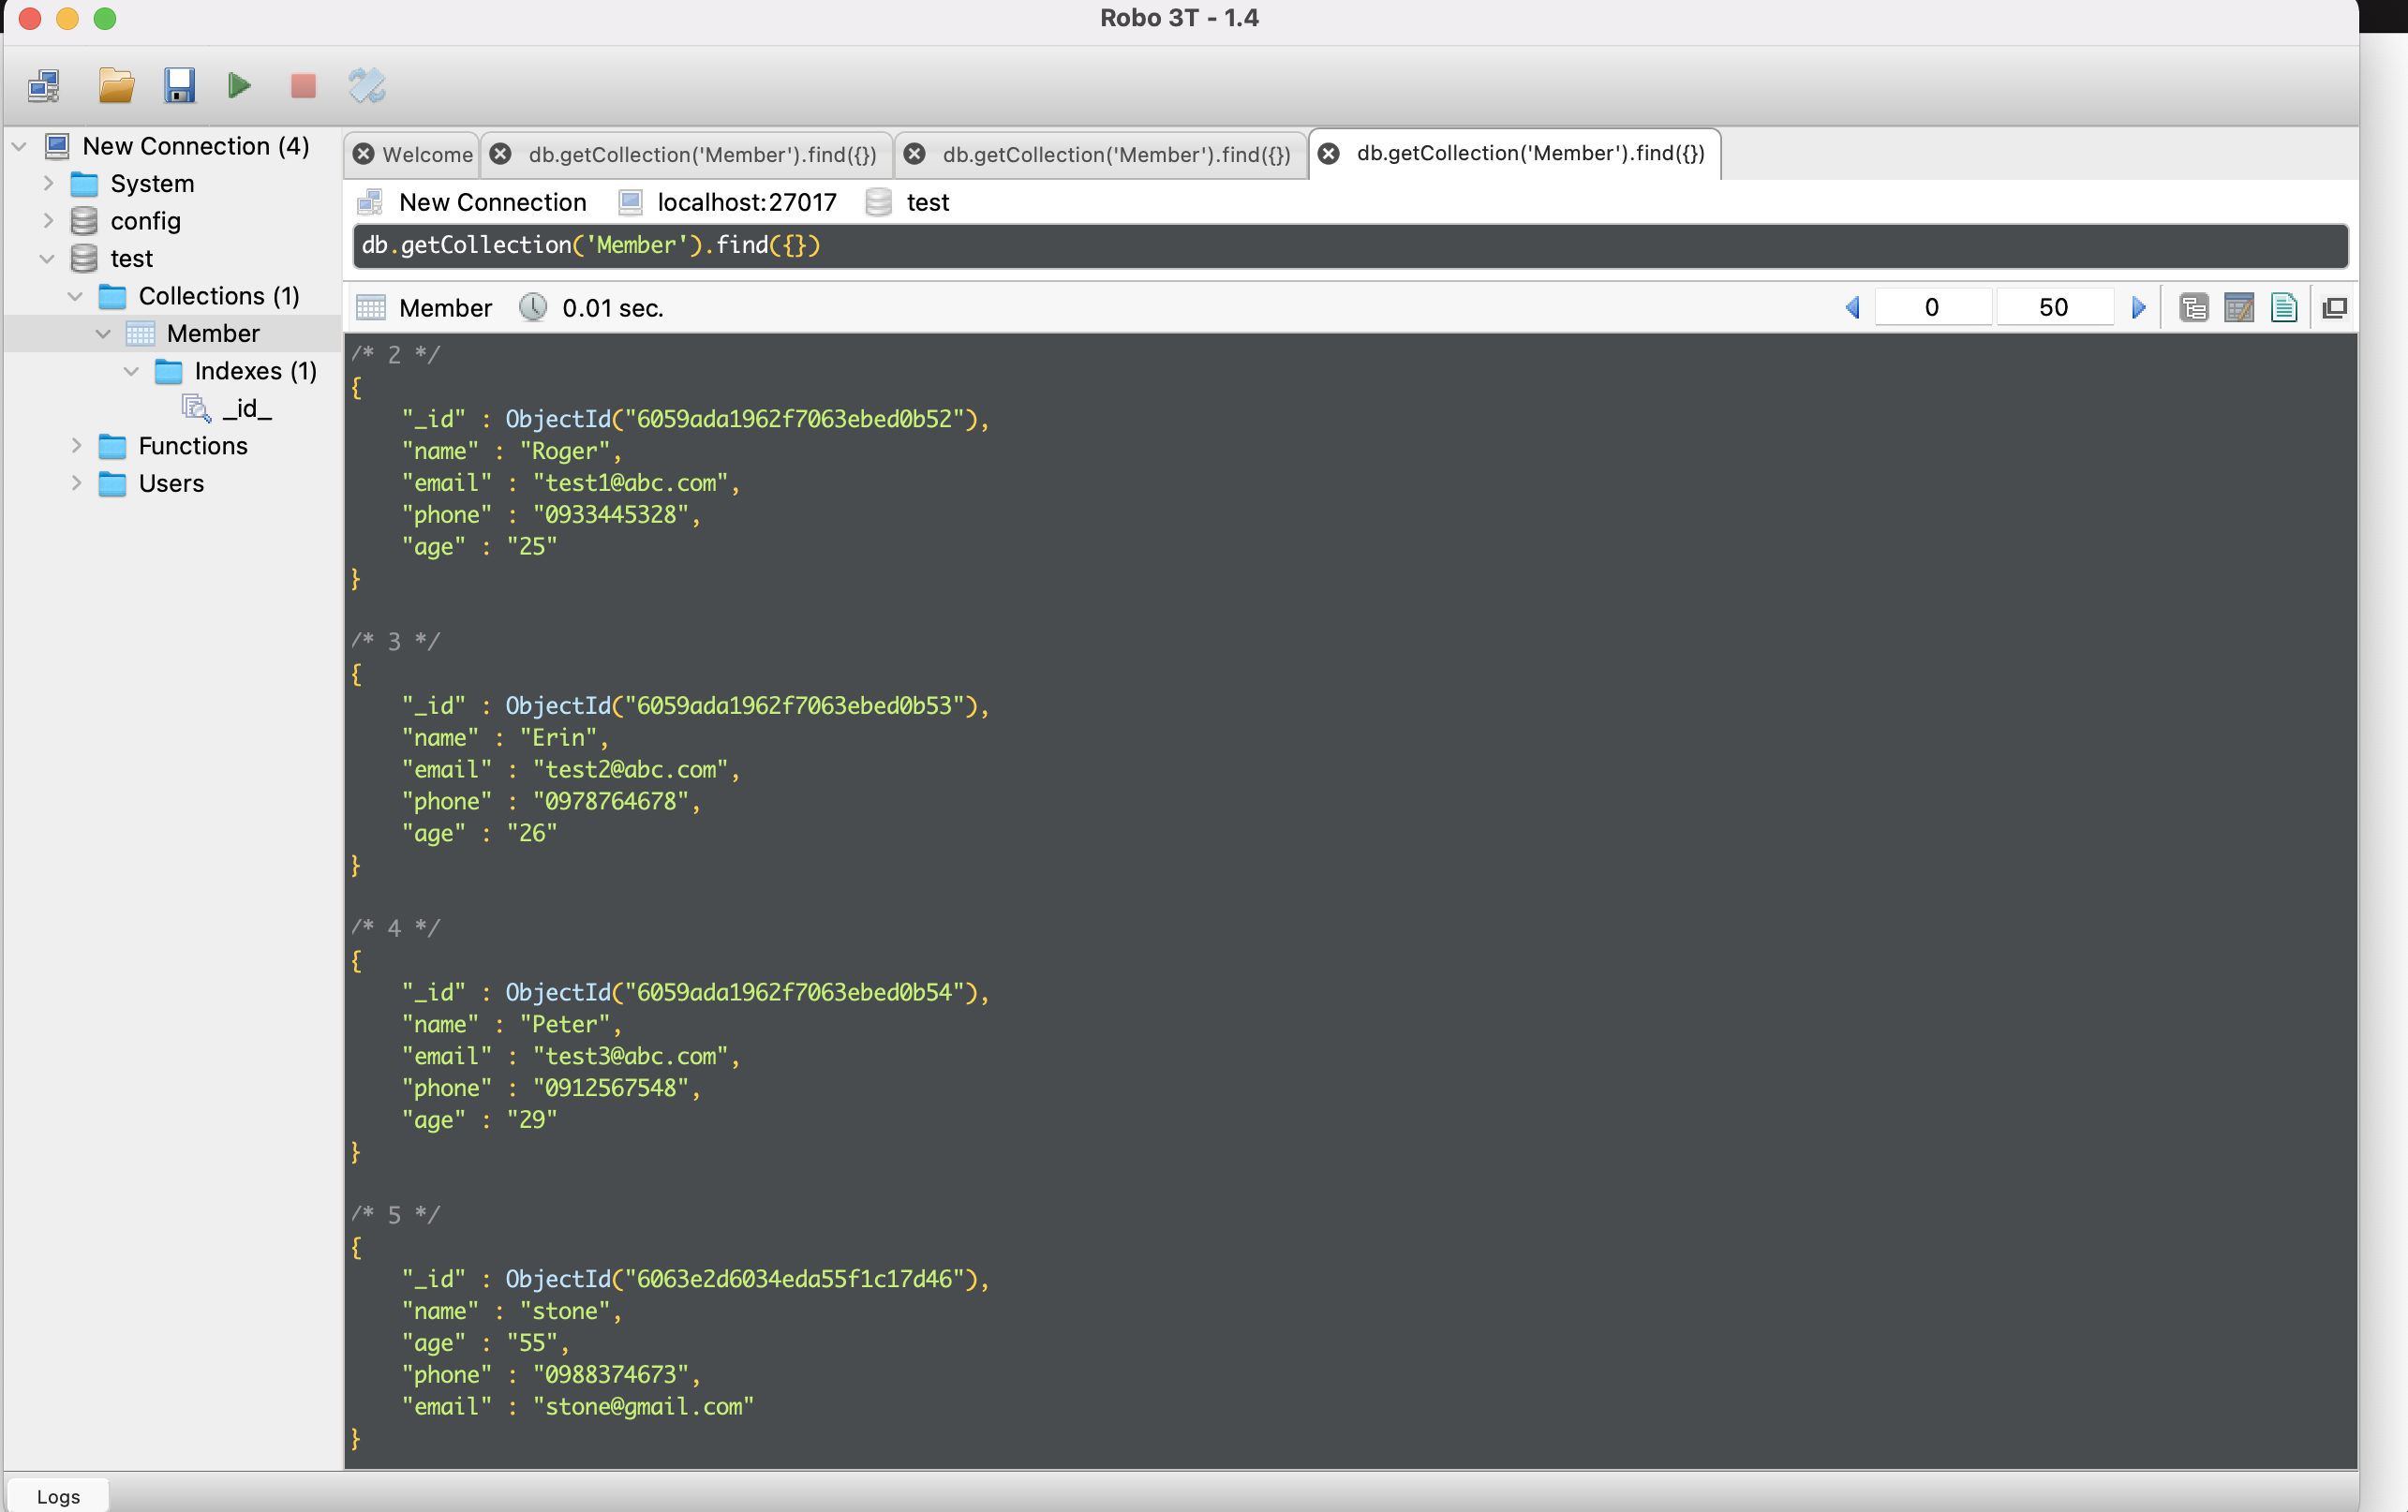

In [6]:
Image("/Users/lochien-min/Desktop/截圖 2021-03-31 上午11.06.51.png",width=400,height=400)

# 作業 2

#### 使用 Get，取得所有的資料。
#### 使用 Get，帶入要取得的資料 id 參數，並成功從 Mongo 中取得某一筆特定資料。

In [ ]:
@app.route('/members')
@app.route('/member/<id>', methods = ['GET'])
def get_member(id=None):
    # 若沒有傳入 id，及取得所有會員資料
    if id is None:
        members = mongo.db.Member.find({})
        result = [] # 宣告一個陣列，回傳結果時需要用到
        
        for member in members:
            member['_id'] = str(member['_id']) # mongo 回傳的 id 為 ObjectId 型別，把 id 轉成一般的字串
            result.append(member)
        return jsonify(result) # 把我們的結果轉換為 json 並回傳
    else:
        result = mongo.db.Member.find_one({'_id': ObjectId(id)})
        if result is not None:
            result['_id'] = str(result['_id']) # mongo 回傳的 id 為 ObjectId 型別，把 id 轉成一般的字串
        
        return jsonify(result) # 把我們的結果轉換為 json 並回傳



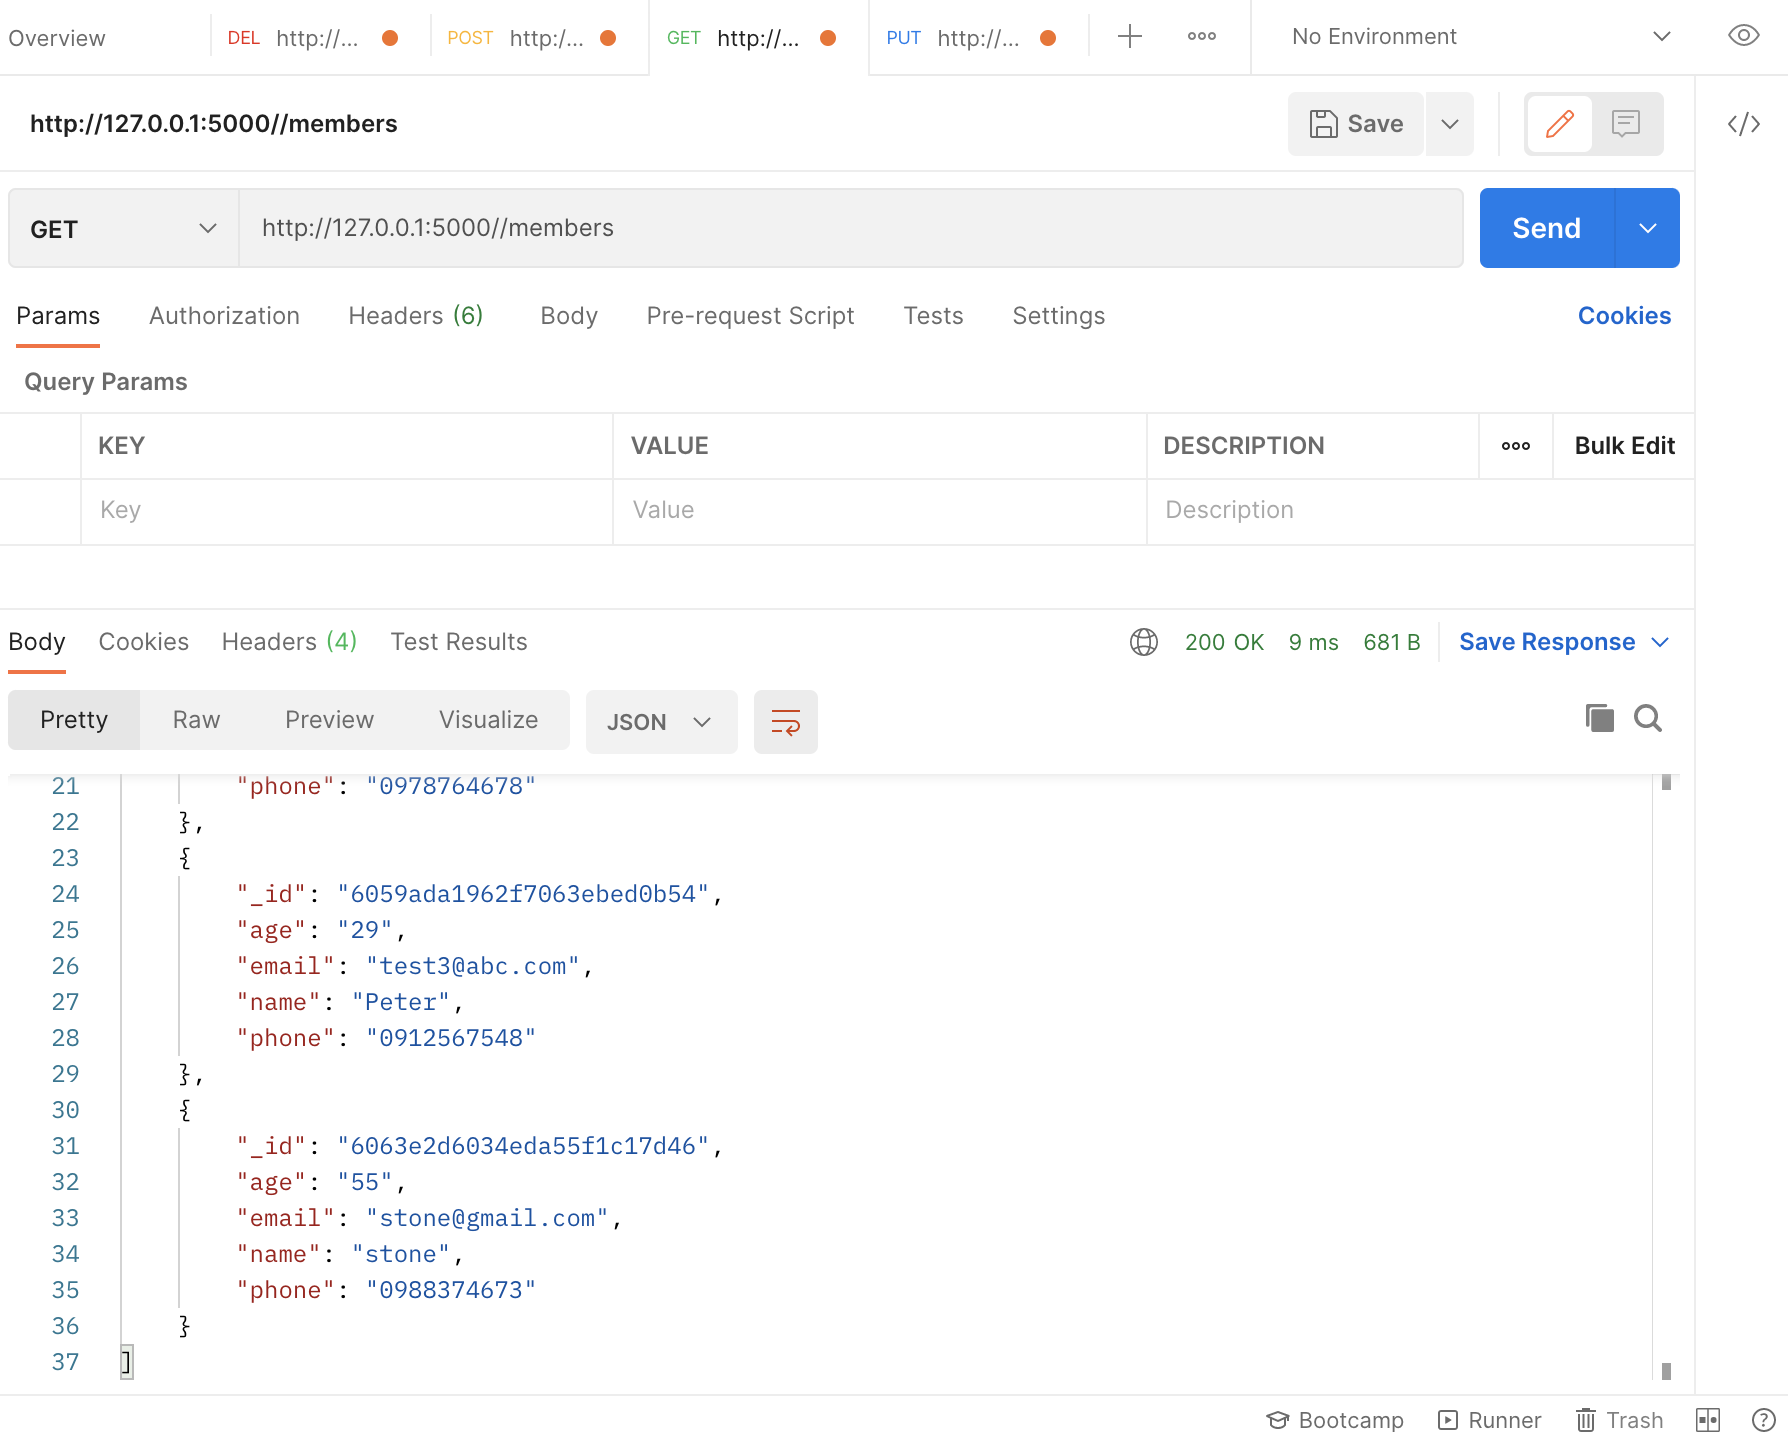

In [7]:
Image("/Users/lochien-min/Desktop/截圖 2021-03-31 上午11.08.42.png",width=400,height=400)

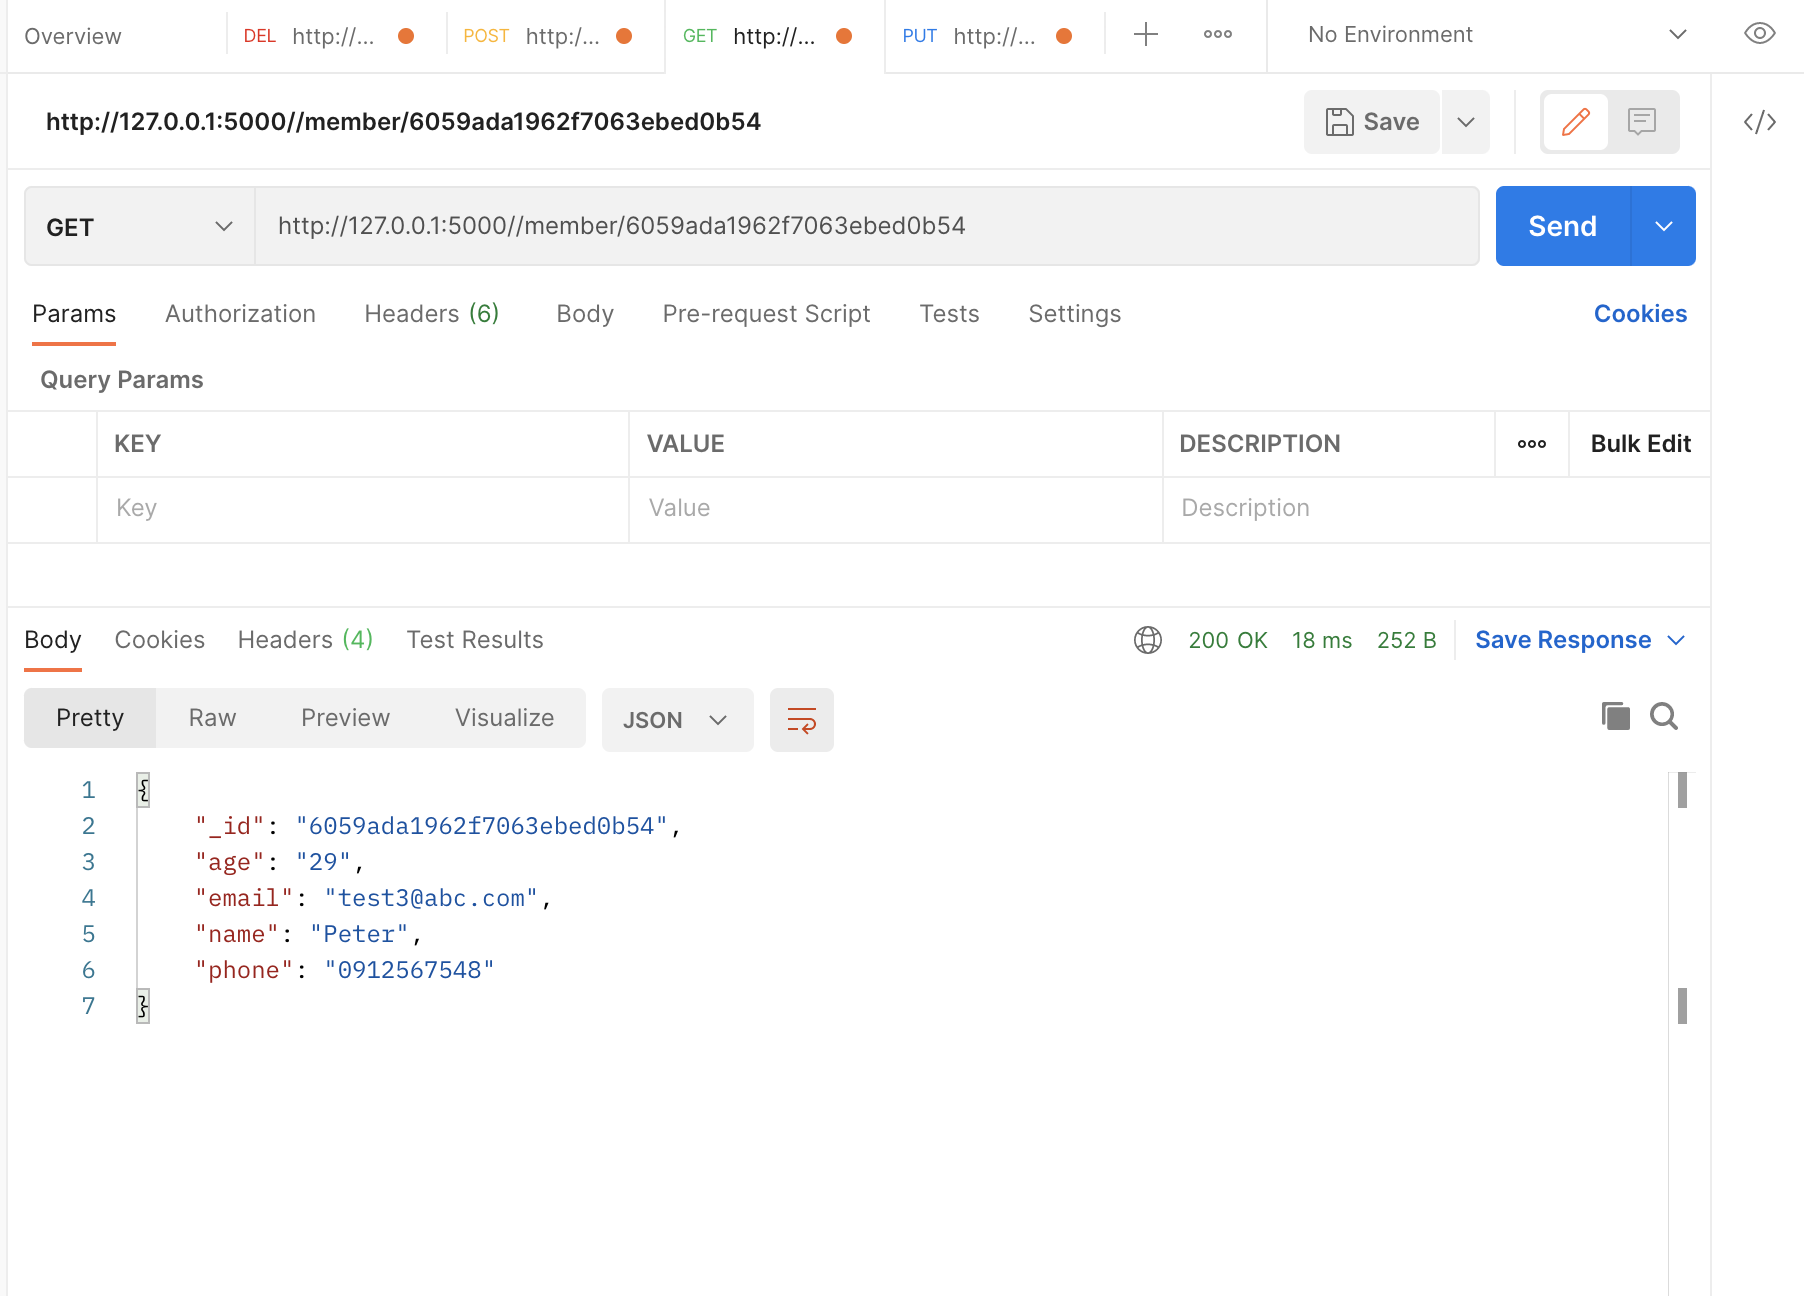

In [6]:
Image("/Users/lochien-min/Desktop/截圖 2021-03-31 上午11.10.32.png",width=400,height=400)

# 作業 3

#### 使用 PUT，帶入要更新的資料id，並傳入 name, age, email 參數，並修改 Mongo 中某一筆資料的值。

In [ ]:
@app.route('/members/<id>', methods = ['PUT'])
def update_member(id):
    result = 0
    
    # 把 form 裡面的資料拿出來
    name = request.form.get('name')
    age = request.form.get('age')
    phone = request.form.get('phone')
    email = request.form.get('email')
    
    # 把新的資料用 dict 型別包裝
    new_value = { "$set": { "name": name, "age": age, "phone": phone, "email": email } }
    # 執行 update_one 進行修改
    upd_result = mongo.db.Member.update_one({"_id": ObjectId(id)}, new_value  )
    
    if upd_result is not None:
        result = upd_result.modified_count
    
    # 回傳更新的資料筆數
    return "Update %s data" % str(result)
    

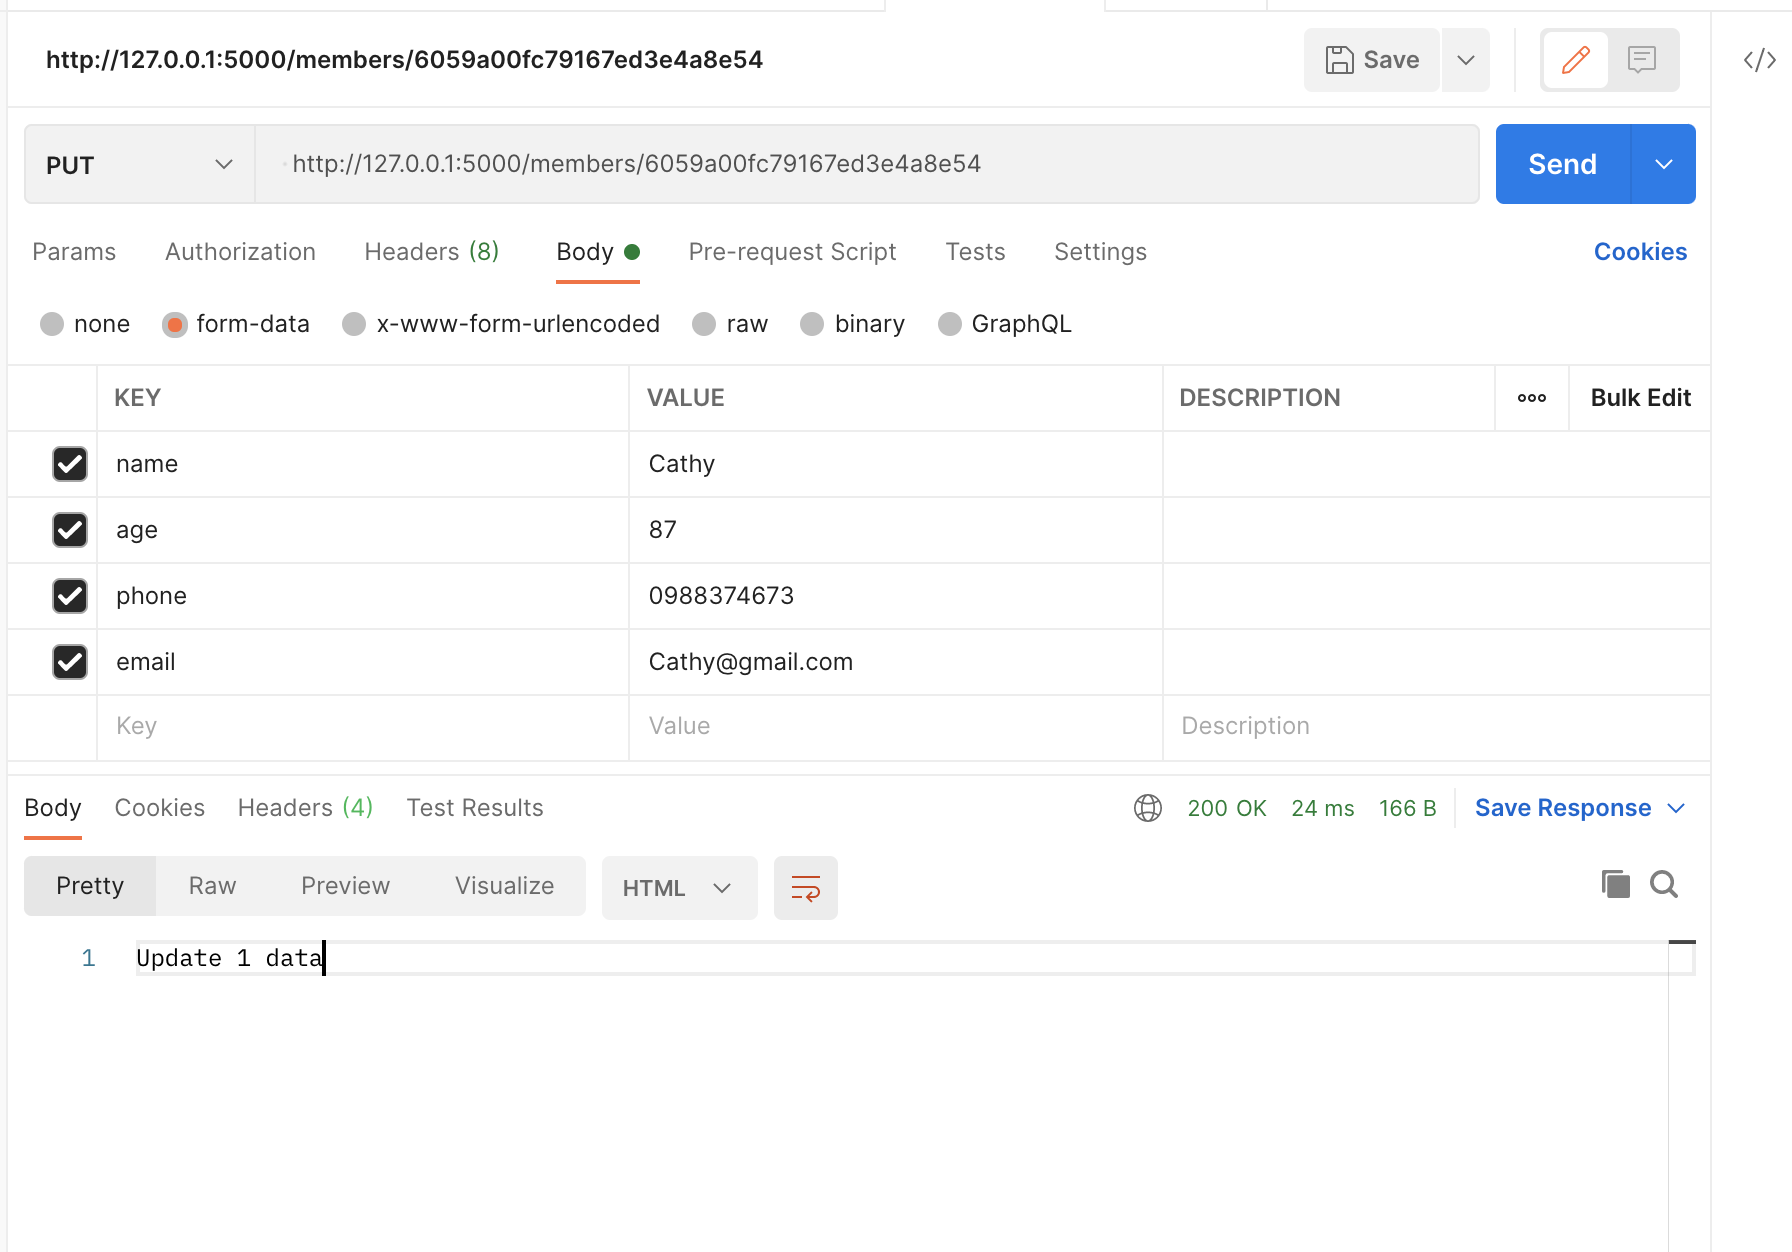

In [2]:
Image("/Users/lochien-min/Desktop/截圖 2021-03-31 上午11.15.13.png",width=400,height=400)

# 作業 4


#### 使用 DELETE，帶入要刪除的資料 id，並刪除 Mongo 中某一筆資料。

In [ ]:
#刪除會員
@app.route('/members/<id>', methods = ['DELETE'])
def remove_member(id):
    result = 0
    
    # 先確定是否有該會員
    member = mongo.db.number.find_one({'_id': ObjectId(id)})
    
    # 若會員存在，執行 delete_one 刪除該會員
    if member is not None:
        del_result = mongo.db.number.delete_one(member)
        result = del_result.deleted_count
        
    # 回傳刪除的資料筆數
    return "Delete %s data" % str(result) 

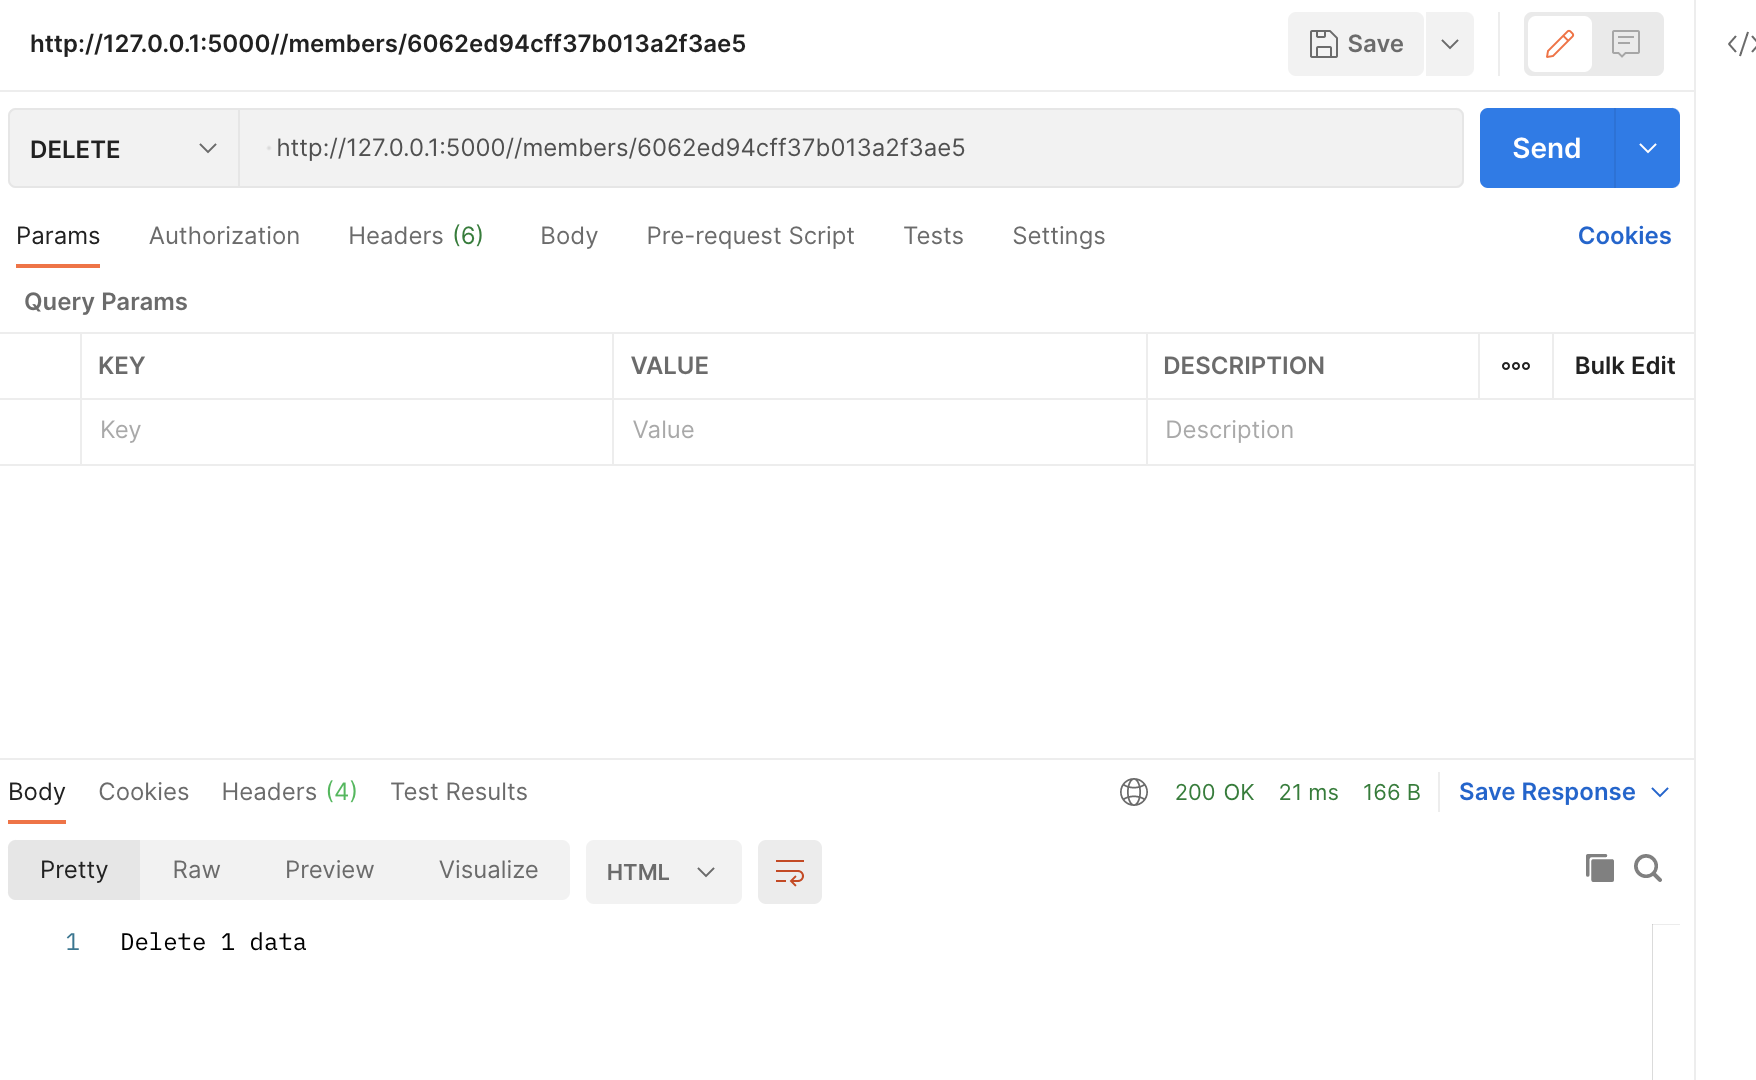

In [3]:
Image("/Users/lochien-min/Desktop/截圖 2021-03-31 上午11.18.09.png",width=400,height=400)

In [ ]:
from flask import Flask ,request,jsonify
from flask_pymongo import PyMongo
from bson.objectid import ObjectId

app= Flask(__name__)
app.config["MONGO_URI"]='mongodb://localhost:27017/test'
mongo=PyMongo(app)

@app.route('/members')
@app.route('/member/<id>', methods = ['GET'])
def get_member(id=None):
    # 若沒有傳入 id，及取得所有會員資料
    if id is None:
        members = mongo.db.Member.find({})
        result = [] # 宣告一個陣列，回傳結果時需要用到
        
        for member in members:
            member['_id'] = str(member['_id']) # mongo 回傳的 id 為 ObjectId 型別，把 id 轉成一般的字串
            result.append(member)
        return jsonify(result) # 把我們的結果轉換為 json 並回傳
    else:
        result = mongo.db.Member.find_one({'_id': ObjectId(id)})
        if result is not None:
            result['_id'] = str(result['_id']) # mongo 回傳的 id 為 ObjectId 型別，把 id 轉成一般的字串
        
        return jsonify(result) # 把我們的結果轉換為 json 並回傳

@app.route('/members', methods = ['POST'])
def add_member():
    # 把 form 裡面的資料拿出來
    name = request.form.get('name')
    age = request.form.get('age')
    phone = request.form.get('phone')
    email = request.form.get('email')
    
    # 執行 insert_one 新增一筆資料
    result = mongo.db.Member.insert_one({'name': name, 'age': age, 'phone': phone, 'email': email})
    
    # 回傳新增資料的 id
    return str(result.inserted_id)

@app.route('/members/<id>', methods = ['PUT'])
def update_member(id):
    result = 0
    
    # 把 form 裡面的資料拿出來
    name = request.form.get('name')
    age = request.form.get('age')
    phone = request.form.get('phone')
    email = request.form.get('email')
    
    # 把新的資料用 dict 型別包裝
    new_value = { "$set": { "name": name, "age": age, "phone": phone, "email": email } }
    # 執行 update_one 進行修改
    upd_result = mongo.db.Member.update_one({"_id": ObjectId(id)}, new_value  )
    
    if upd_result is not None:
        result = upd_result.modified_count
    
    # 回傳更新的資料筆數
    return "Update %s data" % str(result)


@app.route('/members/<id>', methods = ['DELETE'])
def remove_member(id):
    result = 0
    
    # 先確定是否有該會員
    member = mongo.db.Member.find_one({'_id': ObjectId(id)})
    
    # 若會員存在，執行 delete_one 刪除該會員
    if member is not None:
        del_result = mongo.db.Member.delete_one(member)
        result = del_result.deleted_count
        
    # 回傳刪除的資料筆數
    return "Delete %s data" % str(result) 

    
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
